# MLSP Programming Assignment Q3

### Submitted by : Vatsalya Gupta, SC19B098, B.Tech. ECE VII Semester

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
data = pd.read_csv('Wage_dataset.csv', names = ['year', 'age', 'maritl', 'race', 'education', 'region',
                                                'jobclass', 'health', 'health_ins', 'logwage', 'wage'])
data.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,1,2,1,1,2,4.318063,75.043154
1,2004,24,1,1,4,2,2,2,2,4.255273,70.476020
2,2003,45,2,1,3,2,1,1,1,4.875061,130.982177
3,2003,43,2,3,4,2,2,2,1,5.041393,154.685293
4,2005,50,4,1,2,2,2,1,1,4.318063,75.043154


In [3]:
def weights(x, y, degree):
    n = degree
    A = np.zeros((n + 1, n + 1))
    b = np.zeros((n + 1, 1))

    # Solving A b = c
    for i in range(n + 1):
        for j in range(n + 1):
            A[i, j] = sum(x ** (i + j))
        b[i] = sum(x ** (i) * y)

    # Generating weights for polynomial function with degree
    c = np.dot(np.linalg.inv(A), b)
    c = np.flip(c)
    c = c.ravel()
    return c

In [4]:
def polynomial_expression(weights):
    poly = np.poly1d(weights)
    return poly

In [5]:
def fit_x_y(x, y, degree):
    coefficients = weights(x, y, degree)
    poly = polynomial_expression(coefficients)
    fit_x = np.linspace(x.min(), x.max(), 100)
    fit_y = poly(fit_x)
    return fit_x, fit_y, coefficients

In [6]:
def plotting(x, y, fit_x, fit_y, x_label = 'feature', y_label = 'class'):
    plt.scatter(x, y, facecolor='None', edgecolor='red', alpha=0.3)
    plt.plot(fit_x, fit_y, color='blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(['Actual', 'Polynomial fit'])
    plt.show()

## Wage vs Age

Coefficients for polynomial of degree 6 (highest to lowest): [ 2.58405806e-12 -4.94369140e-10  2.31132794e-07  8.11730642e-04
 -1.65576332e-01  1.01217098e+01 -7.45705841e+01]


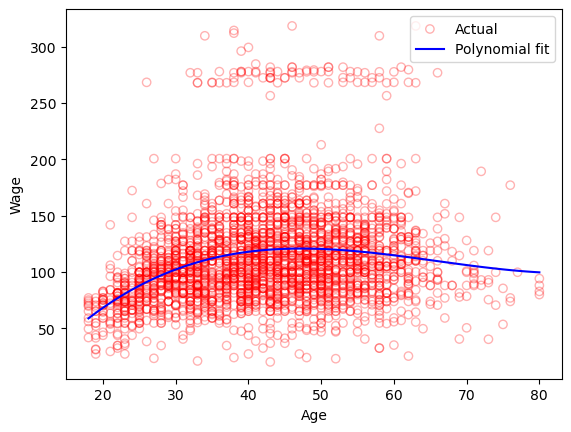

In [7]:
data_x = data['age']
data_y = data['wage']

degree = 6

fit_x, fit_y, coefficients = fit_x_y(data_x, data_y, degree)
print(f'Coefficients for polynomial of degree {degree} (highest to lowest):', coefficients)

plotting(data_x, data_y, fit_x, fit_y, 'Age', 'Wage')

## Wage vs Year

Coefficients for polynomial of degree 3 (highest to lowest): [-7.17132504e-20 -1.88838959e-01  7.58947510e+02 -7.62441000e+05]


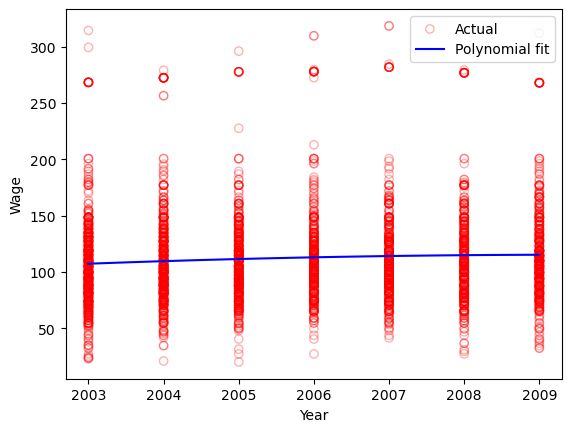

In [8]:
data_x = data['year']
data_y = data['wage']

degree = 3

fit_x, fit_y, coefficients = fit_x_y(data_x, data_y, degree)
print(f'Coefficients for polynomial of degree {degree} (highest to lowest):', coefficients)

plotting(data_x, data_y, fit_x, fit_y, 'Year', 'Wage')

## Wage vs Education

Coefficients for polynomial of degree 4 (highest to lowest): [ 2.96062952e-02  4.38411791e-01 -3.22398882e+00  1.78379257e+01
  6.90224599e+01]


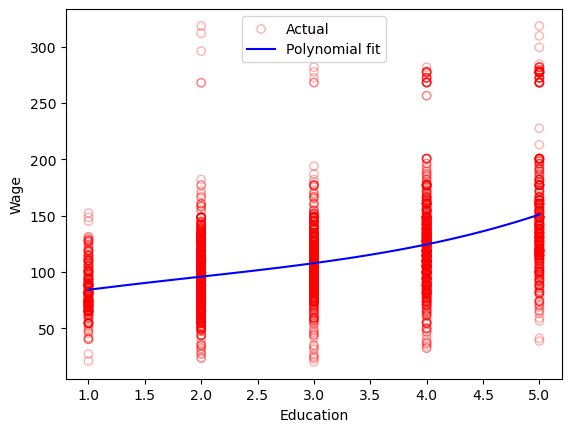

In [9]:
data_x = data['education']
data_y = data['wage']

degree = 4

fit_x, fit_y, coefficients = fit_x_y(data_x, data_y, degree)
print(f'Coefficients for polynomial of degree {degree} (highest to lowest):', coefficients)

plotting(data_x, data_y, fit_x, fit_y, 'Education', 'Wage')

## Inference

We tried to fit polynomials of various degrees for each of the 3 features, i.e. age, year and education. As seen from the obtained polynomial coefficients, we can get an idea of upto what degree of polynomial would fit best the data.

In the case of Wage vs Age, we tried plotting for 6th degree polynomial, but the coefficients of $x^6, x^5, x^4$ are really small. Hence, we could say that a cubic polynomial would have been enough for the fit.

Similarly for Year and Education, the polynomial coefficients are insignificant for $x^3$ and $x^5$ onwards respectively. Hence, a biquadratic polynomial would fit Wage vs Education and a quadratic polynomial fits Wage vs Year.

Even though we are able to fit the data with some regression, we can see from the plots that the results are not good. This is because Wage depends on multiple features and only one feature is not enough to completely specify the Wage with good accuracy. Hence, we need to consider all the features together and go for some other regression technique.